In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

In [3]:
dataset = pd.read_csv("orthorhombic_dataset.csv")
dataset.head(n=10)

,Solids,rA,rB,rX,vA,vB,vX,EA,EB,EX,a,b,c
0,NaUO3,1.02,0.760,1.35,1,5,-2,0.93,1.38,3.44,5.775,5.905,8.250
1,NaTaO3,1.02,0.640,1.35,1,5,-2,0.93,1.50,3.44,5.494,5.513,7.751
2,NaNbO3,1.02,0.640,1.35,1,5,-2,0.93,1.60,3.44,5.510,5.570,7.770
3,NaPaO3,1.02,0.780,1.35,1,5,-2,0.93,1.50,3.44,5.820,5.920,8.360
4,CaMnO3,1.00,0.530,1.35,2,4,-2,1.00,1.55,3.44,5.270,5.275,7.464
5,CaCrO3,1.00,0.550,1.35,2,4,-2,1.00,1.66,3.44,5.287,5.316,7.486
6,CaVO3,1.00,0.580,1.35,2,4,-2,1.00,1.63,3.44,5.326,5.352,7.547
7,CaTiO3,1.00,0.605,1.35,2,4,-2,1.00,1.54,3.44,5.381,5.443,7.645
8,CaRuO3,1.00,0.620,1.35,2,4,-2,1.00,2.20,3.44,5.360,5.530,7.670
9,CaMoO3,1.00,0.650,1.35,2,4,-2,1.00,2.16,3.44,5.450,5.580,7.800


In [4]:
x = dataset.iloc[:,1:10].values
y = dataset.iloc[:,10:].values

In [5]:
#print(x)
#print(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
grid_para={'C':[0.01, 0.1, 1, 5, 10, 50, 100, 150, 200], 'epsilon':np.arange(0.05, 1, 0.05), 'gamma':np.arange(0, 10, 0.25)}

In [60]:
#########################################             for a           ##############################################

#GridSearchCV
a1 = np.zeros(8)
for i in range(2, 10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    gd_sr = GridSearchCV(SVR(kernel = 'rbf'), param_grid = grid_para, scoring='r2', n_jobs=-1, cv=i)
    gd_sr.fit(x_train, y_train[:,0])
    best_para1 = gd_sr.best_params_
    best_result1 = gd_sr.best_score_
    a1[i-2] = best_result1
    print("No. of folds: ",i)
    print("Best parameter value: ",best_para1)
    print("best accuracy for a:",best_result1)
    

No. of folds:  2
Best parameter value:  {'C': 10, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9120393406106223
No. of folds:  3
Best parameter value:  {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9482348246064327
No. of folds:  4
Best parameter value:  {'C': 100, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for a: 0.9511074849443988
No. of folds:  5
Best parameter value:  {'C': 10, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for a: 0.9575543611860138
No. of folds:  6
Best parameter value:  {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9007959574579893
No. of folds:  7
Best parameter value:  {'C': 10, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for a: 0.9378784031209882
No. of folds:  8
Best parameter value:  {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9000892245159899
No. of folds:  9
Best parameter value:  {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9490378598686843


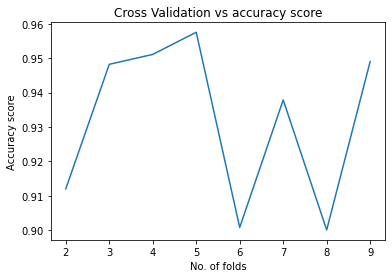

In [61]:
#print(a1)
plt.plot(np.arange(2,10,1), a1)
plt.title("Cross Validation vs accuracy score for 'a'")
plt.xlabel("No. of folds")
plt.ylabel("Accuracy score")
plt.show()

In [62]:
a2 = np.zeros(8)
for i in range(2, 10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    gd_sr = GridSearchCV(SVR(kernel = 'rbf'), param_grid = grid_para, scoring='r2', n_jobs=-1, cv=i)
    gd_sr.fit(x_train, y_train[:,1])
    best_para2 = gd_sr.best_params_
    best_result2 = gd_sr.best_score_
    a2[i-2] = best_result2
    print("No. of folds: ",i)
    print("Hyperparamter for b:",best_para2)
    print("best accuracy for b:",best_result2)
    

No. of folds:  2
Hyperparamter for b: {'C': 1, 'epsilon': 0.05, 'gamma': 9.75}
best accuracy for b: 0.4536808443191839
No. of folds:  3
Hyperparamter for b: {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for b: 0.7504792850012567
No. of folds:  4
Hyperparamter for b: {'C': 100, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for b: 0.7764272735813558
No. of folds:  5
Hyperparamter for b: {'C': 150, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for b: 0.7998977473490687
No. of folds:  6
Hyperparamter for b: {'C': 50, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for b: 0.7926437830749404
No. of folds:  7
Hyperparamter for b: {'C': 100, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for b: 0.7810356044378585
No. of folds:  8
Hyperparamter for b: {'C': 5, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for b: 0.7504475447039491
No. of folds:  9
Hyperparamter for b: {'C': 50, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for b: 0.781502639780784


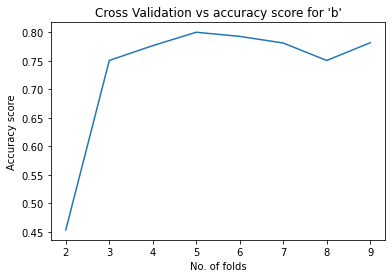

In [63]:
#print(a1)
plt.plot(np.arange(2,10,1), a2)
plt.title("Cross Validation vs accuracy score for 'b'")
plt.xlabel("No. of folds")
plt.ylabel("Accuracy score")
plt.show()

In [69]:
a3 = np.zeros(8)
for i in range(2, 10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    gd_sr = GridSearchCV(SVR(kernel = 'rbf'), param_grid = grid_para, scoring='r2', n_jobs=-1, cv=i)
    gd_sr.fit(x_train, y_train[:,2])
    best_para3 = gd_sr.best_params_
    best_result3 = gd_sr.best_score_
    a3[i-2] = best_result3
    print("No. of folds: ",i)
    print("Hyperparamter for c:",best_para3)
    print("best accuracy for c:",best_result3)
    

No. of folds:  2
Hyperparamter for c: {'C': 150, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for c: 0.8989904799370887
No. of folds:  3
Hyperparamter for c: {'C': 50, 'epsilon': 0.05, 'gamma': 0.75}
best accuracy for c: 0.8955242310417776
No. of folds:  4
Hyperparamter for c: {'C': 150, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for c: 0.9029332050100963
No. of folds:  5
Hyperparamter for c: {'C': 200, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for c: 0.8947451376128722
No. of folds:  6
Hyperparamter for c: {'C': 200, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for c: 0.877610640033645
No. of folds:  7
Hyperparamter for c: {'C': 200, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for c: 0.8970326597819627
No. of folds:  8
Hyperparamter for c: {'C': 150, 'epsilon': 0.05, 'gamma': 6.75}
best accuracy for c: 0.9241127877335542
No. of folds:  9
Hyperparamter for c: {'C': 100, 'epsilon': 0.05, 'gamma': 0.5}
best accuracy for c: 0.8880993349783628


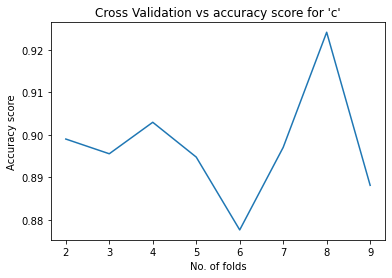

In [70]:
#print(a1)
plt.plot(np.arange(2,10,1), a3)
plt.title("Cross Validation vs accuracy score for 'c'")
plt.xlabel("No. of folds")
plt.ylabel("Accuracy score")
plt.show()

In [21]:
reg1 = SVR(kernel='rbf', C=10, epsilon=0.05, gamma=0.5)
f1 = reg1.fit(x_train,y_train[:,0])
ypred1 = f1.predict(x_test)
#print(np.shape(f1.predict(x_train)))
print("Training data error :", np.mean(np.abs(y_train[:,0]-f1.predict(x_train))*100/y_train[:,0]))

Training data error : 0.4318478261623707


In [22]:
reg2 = SVR(kernel='rbf', C=150, epsilon=0.05, gamma=0.25)
f2 = reg2.fit(x_train,y_train[:,1])
ypred2 = f2.predict(x_test)
print("Training data error :", np.mean(np.abs(y_train[:,1]-f2.predict(x_train))*100/y_train[:,1]))

Training data error : 0.7674208217896623


In [23]:
reg3 = SVR(kernel='rbf', C=150, epsilon=0.05, gamma=6.75)
f3 = reg3.fit(x_train,y_train[:,2])
ypred3 = f3.predict(x_test)
print("Training data error :", np.mean(np.abs(y_train[:,2]-f3.predict(x_train))*100/y_train[:,2]))

Training data error : 0.4549417913293777


In [24]:
#ypred = np.hstack((np.hstack((ypred1.reshape(-1,1), ypred2.reshape(-1,1))), ypred3.reshape(-1,1)))
ypred = np.hstack((ypred1.reshape(-1,1), ypred2.reshape(-1,1), ypred3.reshape(-1,1)))
#print(ypred)

In [25]:
error = abs((y_test-ypred)/y_test)
print("Testing data error in a:", np.mean(error[:,0]))
print("Testing data error in b:", np.mean(error[:,1]))
print("Testing data error in c:", np.mean(error[:,2]))

Testing data error in a: 0.005030418636713539
Testing data error in b: 0.009481831574047913
Testing data error in c: 0.007862393663726363


In [26]:
print("R2 for test data for 'a' is ",reg1.score(x_test, y_test[:,0]))
print("R2 for test data for 'b' is ",reg2.score(x_test, y_test[:,1]))
print("R2 for test data for 'c' is ",reg3.score(x_test, y_test[:,2]))

R2 for test data for 'a' is  0.9704645216642738
R2 for test data for 'b' is  0.805846885012556
R2 for test data for 'c' is  0.9245861441501176


In [27]:
print("R2 for train data for 'a' is ",reg1.score(x_train, y_train[:,0]))
print("R2 for train data for 'b' is ",reg2.score(x_train, y_train[:,1]))
print("R2 for train data for 'c' is ",reg3.score(x_train, y_train[:,2]))

R2 for train data for 'a' is  0.9717909087265196
R2 for train data for 'b' is  0.8487183968119407
R2 for train data for 'c' is  0.9776850079341334


In [98]:
x_train

array([[0.938, 0.645, 1.35 , ..., 1.2  , 1.83 , 3.44 ],
       [0.958, 0.62 , 1.35 , ..., 1.17 , 1.81 , 3.44 ],
       [1.01 , 0.645, 1.35 , ..., 1.12 , 1.83 , 3.44 ],
       ...,
       [0.958, 0.645, 1.35 , ..., 1.17 , 1.55 , 3.44 ],
       [1.032, 0.645, 1.35 , ..., 1.1  , 1.55 , 3.44 ],
       [0.868, 0.645, 1.35 , ..., 1.1  , 1.55 , 3.44 ]])

In [28]:
print("Training data error in 'a':", np.mean(np.abs(y_train[:,0]-f1.predict(x_train))/y_train[:,0]))
print("Training data error in 'b':", np.mean(np.abs(y_train[:,1]-f2.predict(x_train))/y_train[:,1]))
print("Training data error in 'c':", np.mean(np.abs(y_train[:,2]-f3.predict(x_train))/y_train[:,2]))
print("Testing data error in a:", np.mean(error[:,0]))
print("Testing data error in b:", np.mean(error[:,1]))
print("Testing data error in c:", np.mean(error[:,2]))

Training data error in 'a': 0.004318478261623707
Training data error in 'b': 0.0076742082178966236
Training data error in 'c': 0.004549417913293777
Testing data error in a: 0.005030418636713539
Testing data error in b: 0.009481831574047913
Testing data error in c: 0.007862393663726363


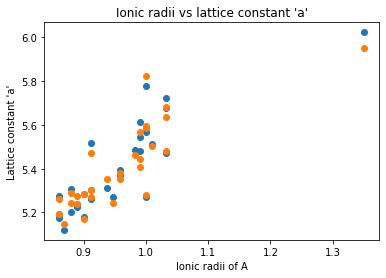

In [29]:
plt.scatter(x_test[:,0],y_test[:,0])
plt.scatter(x_test[:,0],ypred[:,0])
plt.title("Ionic radii vs lattice constant 'a'")
plt.xlabel("Ionic radii of A")
plt.ylabel("Lattice constant 'a'")
plt.show()

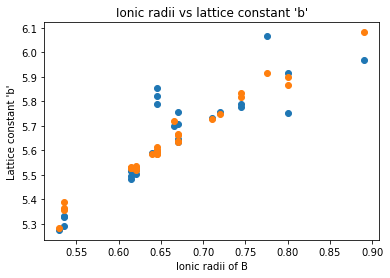

In [30]:
plt.scatter(x_test[:,1],y_test[:,1])
plt.scatter(x_test[:,1],ypred[:,1])
plt.title("Ionic radii vs lattice constant 'b'")
plt.xlabel("Ionic radii of B")
plt.ylabel("Lattice constant 'b'")
plt.show()

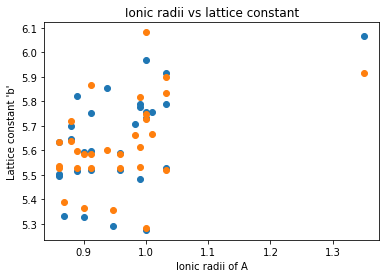

In [31]:
plt.scatter(x_test[:,0],y_test[:,1])
plt.scatter(x_test[:,0],ypred[:,1])
plt.title("Ionic radii vs lattice constant")
plt.xlabel("Ionic radii of A")
plt.ylabel("Lattice constant 'b'")
plt.show()

In [17]:
np.savetxt('x_train.csv', x_train, delimiter=',', fmt='%6f')

In [18]:
np.savetxt('x_test.csv', x_test, delimiter=',', fmt='%6f')

In [19]:
np.savetxt('y_train.csv', y_train, delimiter=',', fmt='%6f')

In [20]:
np.savetxt('y_test.csv', y_test, delimiter=',', fmt='%6f')